## Movie Studio Analysis

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read the dataset
df = pd.read_csv('data\movie_data.csv')

Our dataset contains 5043 rows and 26 columns

In [4]:
df.shape

(5043, 26)

In [5]:
df.head()

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_reviews         4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_users_voted            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### Exploratory Data Analysis

First, we look at the number of missing values across all the columns

In [7]:
df.isna().sum()

color                         19
director_name                104
num_critic_reviews            50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_users_voted                0
cast_total_facebook_likes      0
actor_3_name                  23
plot_keywords                153
num_user_reviews              21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
movie_score                    0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

To measure the success of the film, we consider the difference between the gross and the budget values.
In this dataset, the gross value is missing for 884 records and budget value is missing for 492 records. So we remove these records in our analysis.

In [8]:
# remove records with missing values for gross
moviedf = df[df['gross'].isna()==False]

In [9]:
# remove records with missing values for budget
moviedf = moviedf[moviedf['budget'].isna()==False]

In [10]:
#For a successful movie, the gross should be greater than the budget
moviedf['Profit'] = moviedf['gross'] - moviedf['budget']

#### we define a new column - profit percentage 

In [11]:
moviedf['profitPercent'] = round((moviedf['Profit'] / moviedf['budget'])*100,2)

In [12]:
moviedf

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,Profit,profitPercent
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.89
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.13
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.34
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.25
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0,5968.00
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74,63071.0,901.01
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,29056.00
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,-4416.0,-49.07


### Profitable movies
If the movie made a profit thats atleast 50% of the budget , then it's considered successful

In [13]:
successfulMovies = moviedf[moviedf['profitPercent']>50]

In [14]:
successfulMovies

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,Profit,profitPercent
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.89
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.25
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,208991599.0,83.60
13,Color,Gore Verbinski,313.0,151.0,563.0,1000.0,Orlando Bloom,40000.0,423032628.0,Action|Adventure|Fantasy,...,USA,PG-13,225000000.0,2006.0,5000.0,7.3,2.35,5000,198032628.0,88.01
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,403279547.0,183.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,663780.0,6637.80
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0,5968.00
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74,63071.0,901.01
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,29056.00


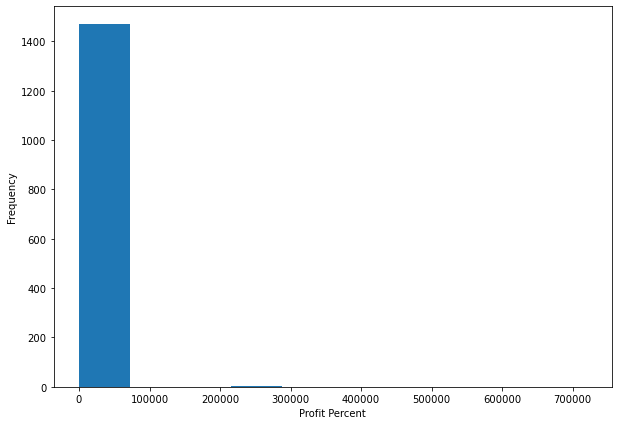

In [15]:
# box plot for profitpercent - outlier detection

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
#plt.boxplot(successfulMovies['profitPercent'])
plt.hist(successfulMovies['profitPercent']) 
plt.xlabel('Profit Percent')
plt.ylabel('Frequency')
# show plot
plt.show()

In [16]:
successfulMovies.sort_values(['profitPercent'],ascending=False)[['movie_title','gross','budget','Profit','profitPercent']][:10]

,movie_title,gross,budget,Profit,profitPercent
4793,Paranormal Activity,107917283.0,15000.0,107902283.0,719348.55
4799,Tarnation,592014.0,218.0,591796.0,271466.06
4707,The Blair Witch Project,140530114.0,60000.0,140470114.0,234116.86
4984,The Brothers McMullen,10246600.0,25000.0,10221600.0,40886.40
4936,The Texas Chain Saw Massacre,30859000.0,83532.0,30775468.0,36842.73
3278,The Texas Chain Saw Massacre,30859000.0,83532.0,30775468.0,36842.73
5035,El Mariachi,2040920.0,7000.0,2033920.0,29056.00
4956,The Gallows,22757819.0,100000.0,22657819.0,22657.82
4977,Super Size Me,11529368.0,65000.0,11464368.0,17637.49
2619,Halloween,47000000.0,300000.0,46700000.0,15566.67


Top 10 movies by profit

In [17]:
successfulMovies.sort_values(['Profit'],ascending=False)[['movie_title','gross','budget','Profit','profitPercent']][:10]


,movie_title,gross,budget,Profit,profitPercent
0,Avatar,760505847.0,237000000.0,523505847.0,220.89
29,Jurassic World,652177271.0,150000000.0,502177271.0,334.78
26,Titanic,658672302.0,200000000.0,458672302.0,229.34
3024,Star Wars: Episode IV - A New Hope,460935665.0,11000000.0,449935665.0,4090.32
3080,E.T. the Extra-Terrestrial,434949459.0,10500000.0,424449459.0,4042.38
794,The Avengers,623279547.0,220000000.0,403279547.0,183.31
17,The Avengers,623279547.0,220000000.0,403279547.0,183.31
509,The Lion King,422783777.0,45000000.0,377783777.0,839.52
240,Star Wars: Episode I - The Phantom Menace,474544677.0,115000000.0,359544677.0,312.65
66,The Dark Knight,533316061.0,185000000.0,348316061.0,188.28


Top 10 movies by Budget

In [18]:
successfulMovies.sort_values(['budget'],ascending=False)[['movie_title','gross','budget','Profit','profitPercent']][:10]

,movie_title,gross,budget,Profit,profitPercent
8,Avengers: Age of Ultron,458991599.0,250000000.0,208991599.0,83.60
27,Captain America: Civil War,407197282.0,250000000.0,157197282.0,62.88
3,The Dark Knight Rises,448130642.0,250000000.0,198130642.0,79.25
0,Avatar,760505847.0,237000000.0,523505847.0,220.89
13,Pirates of the Caribbean: Dead Man's Chest,423032628.0,225000000.0,198032628.0,88.01
17,The Avengers,623279547.0,220000000.0,403279547.0,183.31
794,The Avengers,623279547.0,220000000.0,403279547.0,183.31
36,Transformers: Revenge of the Fallen,402076689.0,200000000.0,202076689.0,101.04
3493,Skyfall,304360277.0,200000000.0,104360277.0,52.18
80,Iron Man 2,312057433.0,200000000.0,112057433.0,56.03


Top 10 movies by gross revenue

In [19]:
successfulMovies.sort_values(['gross'],ascending=False)[['movie_title','gross','budget','Profit','profitPercent']][:10]

,movie_title,gross,budget,Profit,profitPercent
0,Avatar,760505847.0,237000000.0,523505847.0,220.89
26,Titanic,658672302.0,200000000.0,458672302.0,229.34
29,Jurassic World,652177271.0,150000000.0,502177271.0,334.78
17,The Avengers,623279547.0,220000000.0,403279547.0,183.31
794,The Avengers,623279547.0,220000000.0,403279547.0,183.31
66,The Dark Knight,533316061.0,185000000.0,348316061.0,188.28
240,Star Wars: Episode I - The Phantom Menace,474544677.0,115000000.0,359544677.0,312.65
3024,Star Wars: Episode IV - A New Hope,460935665.0,11000000.0,449935665.0,4090.32
8,Avengers: Age of Ultron,458991599.0,250000000.0,208991599.0,83.60
3,The Dark Knight Rises,448130642.0,250000000.0,198130642.0,79.25


In [20]:
successfulMovies.describe()

,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_users_voted,cast_total_facebook_likes,num_user_reviews,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,Profit,profitPercent
count,1472.000000,1472.000000,1472.000000,1471.000000,1472.000000,1.472000e+03,1.472000e+03,1472.000000,1472.000000,1.472000e+03,1472.000000,1472.000000,1472.000000,1455.0000,1472.000000,1.472000e+03,1472.000000
mean,178.925272,109.366168,927.955842,876.653297,7801.758152,8.269512e+07,1.495072e+05,11900.812500,416.895380,2.909234e+07,2000.564538,2108.243886,6.706997,2.0651,11662.298234,5.360278e+07,1451.243859
std,133.322006,22.308565,3341.336703,2198.511186,20022.460171,8.910663e+07,1.929057e+05,24058.242466,486.177994,3.739286e+07,12.445281,5436.511339,1.055006,0.4600,24188.410810,6.160102e+07,21046.101279
min,1.000000,34.000000,0.000000,0.000000,0.000000,7.007100e+04,5.000000e+00,0.000000,1.000000,2.180000e+02,1920.000000,0.000000,1.600000,1.1800,0.000000,6.138200e+04,50.140000
25%,81.000000,94.000000,11.000000,194.500000,725.250000,2.712839e+07,3.173225e+04,1919.250000,138.750000,6.500000e+06,1995.000000,371.000000,6.100000,1.8500,0.000000,1.593661e+07,100.845000
50%,148.000000,105.000000,70.000000,455.000000,1000.000000,5.423765e+07,8.011050e+04,3830.000000,271.000000,1.700000e+07,2003.000000,670.000000,6.800000,1.8500,121.500000,3.321025e+07,181.995000
75%,234.250000,120.000000,252.000000,691.500000,13000.000000,1.069895e+08,1.868092e+05,16090.250000,500.500000,3.500000e+07,2009.000000,970.000000,7.500000,2.3500,14000.000000,6.858810e+07,402.590000
max,813.000000,289.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.676169e+06,656730.000000,5060.000000,2.500000e+08,2016.000000,137000.000000,9.200000,16.0000,199000.000000,5.235058e+08,719348.550000


#### Univariate analysis

#### Categorical variables

Text(0.5, 1.0, 'Distribution of color category')

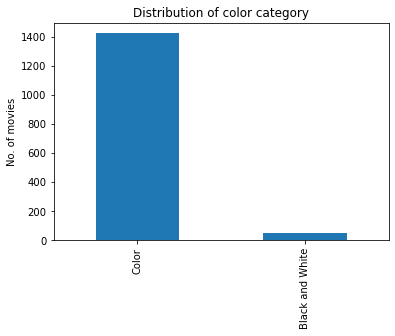

In [21]:
#successfulMovies['color'].value_counts().plot(kind='bar')
successfulMovies['color'].value_counts().plot(kind='bar')
plt.ylabel('No. of movies')
plt.title('Distribution of color category')

Text(0.5, 1.0, 'Distribution of language')

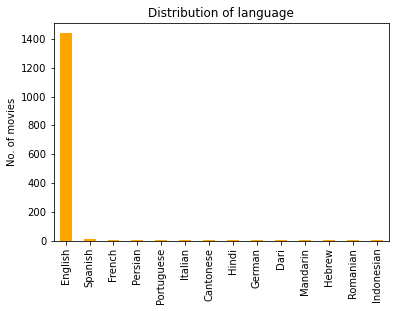

In [22]:
successfulMovies['language'].value_counts().plot(kind='bar', color='orange')
plt.ylabel('No. of movies')
plt.title('Distribution of language')

Text(0.5, 1.0, 'Distribution of country')

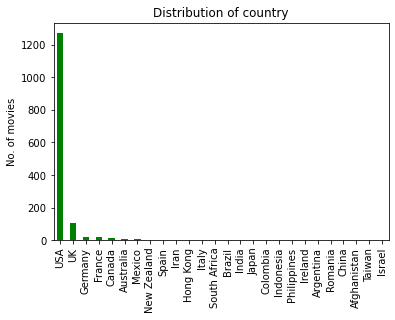

In [23]:
successfulMovies['country'].value_counts().plot(kind='bar', color='green')
plt.ylabel('No. of movies')
plt.title('Distribution of country')

Text(0.5, 1.0, 'Distribution of content rating')

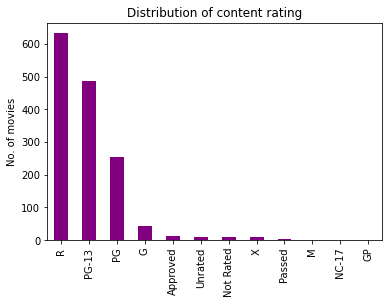

In [24]:
successfulMovies['content_rating'].value_counts().plot(kind='bar', color='purple')
plt.ylabel('No. of movies')
plt.title('Distribution of content rating')

In [25]:
#successfulMovies['genres'].str.get_dummies(sep='|')
genredf = successfulMovies['genres'].str.split('|', expand=True).stack().value_counts()

Text(0.5, 1.0, 'Distribution of genre')

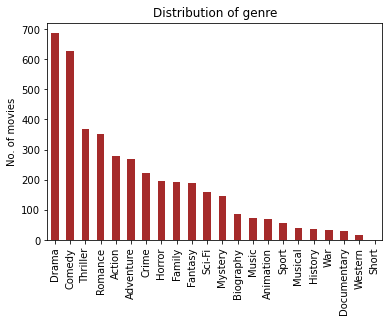

In [26]:
genredf.plot(kind='bar', color='brown')
plt.ylabel('No. of movies')
plt.title('Distribution of genre')

In [27]:
plotdf = successfulMovies['plot_keywords'].str.split('|', expand=True).stack().value_counts()

In [29]:
newdf = pd.DataFrame({'keyword':plotdf.index, 'count':plotdf.values})

In [30]:
newdf

,keyword,count
0,friend,66
1,love,58
2,high school,44
3,murder,38
4,death,37
...,...,...
3578,madness,1
3579,human versus alien,1
3580,drug smuggling,1
3581,playboy mansion,1


Text(0.5, 1.0, 'Distribution of plot keywords')

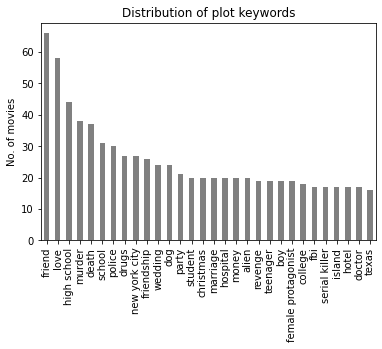

In [31]:
plotdf[:30].plot(kind='bar', color='grey')
plt.ylabel('No. of movies')
plt.title('Distribution of plot keywords')

In [32]:
newdf.keyword.values

array(['friend', 'love', 'high school', ..., 'drug smuggling',
       'playboy mansion', 'pregnant woman in bathtub'], dtype=object)

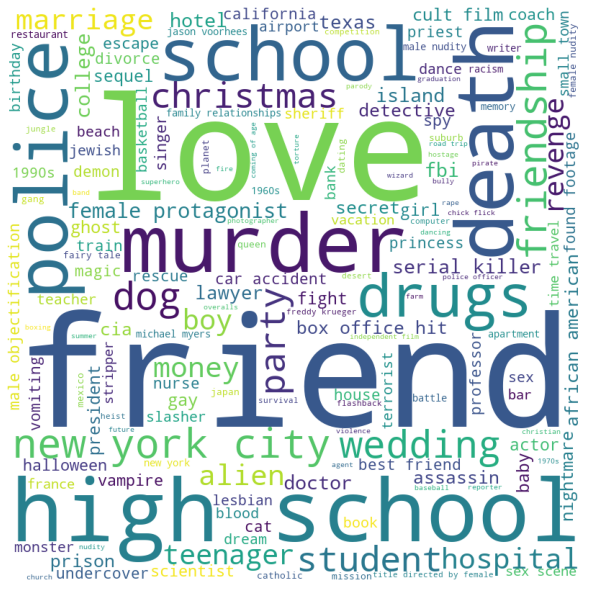

In [33]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 



wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate_from_frequencies(newdf.set_index('keyword').to_dict()['count']) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


Text(0.5, 1.0, 'Top 10 directors')

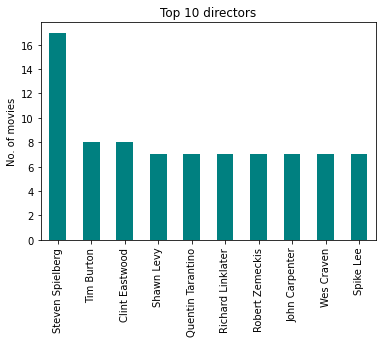

In [34]:
successfulMovies['director_name'].value_counts()[:10].plot(kind='bar', color='teal')
plt.ylabel('No. of movies')
plt.title('Top 10 directors')

In [35]:
successfulMovies['director_name'].value_counts()

Steven Spielberg     17
Tim Burton            8
Clint Eastwood        8
Shawn Levy            7
Quentin Tarantino     7
                     ..
Tommy Lee Wallace     1
Joel Gallen           1
Mamoru Hosoda         1
Olivier Assayas       1
Steve Box             1
Name: director_name, Length: 852, dtype: int64

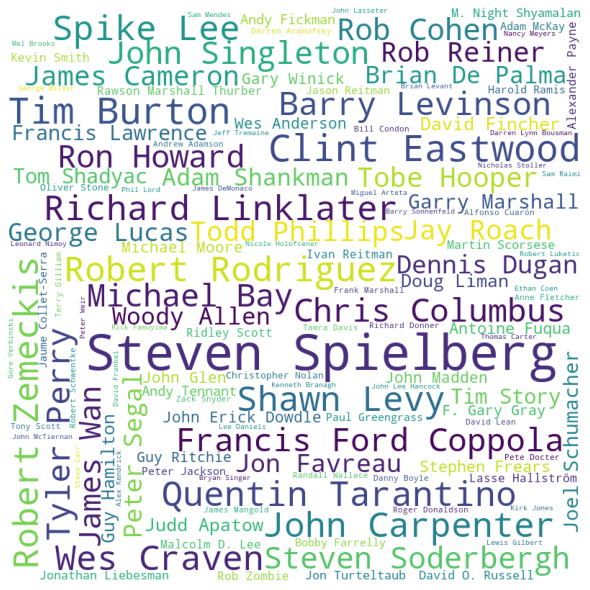

In [36]:
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate_from_frequencies(successfulMovies['director_name'].value_counts().to_dict()) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

#### Continuous variables

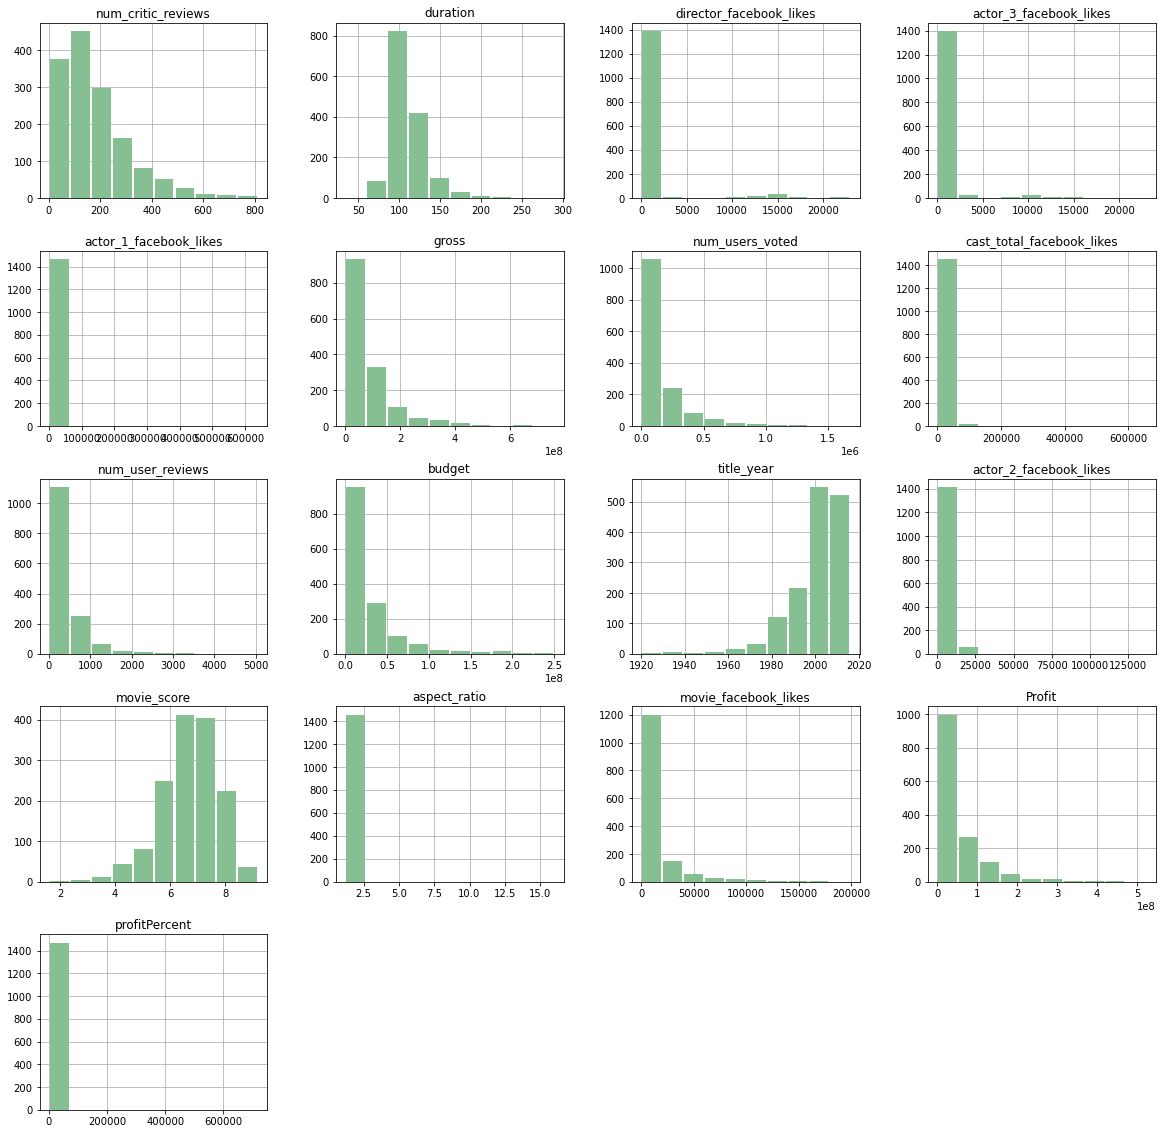

In [37]:
ax = successfulMovies.hist(figsize=(20,20), color='#86bf91', zorder=2, rwidth=0.9)

Longest and shortest movies

In [38]:
successfulMovies.sort_values(['duration'],ascending=False)[['movie_title','duration']][:1]

,movie_title,duration
1571,Apocalypse Now,289.0


In [39]:
successfulMovies.sort_values(['duration'],ascending=True)[['movie_title','duration']][:1]

,movie_title,duration
4198,Marilyn Hotchkiss' Ballroom Dancing and Charm ...,34.0


Top 10 movies by user reviews

In [41]:
pd.set_option('display.max_colwidth', None)

In [42]:
successfulMovies['num_user_reviews'] = successfulMovies['num_user_reviews'].astype(int)

In [43]:
successfulMovies.sort_values(['num_user_reviews'],ascending=False)[['movie_title','num_user_reviews']][:1]

,movie_title,num_user_reviews
270,The Lord of the Rings: The Fellowship of the Ring,5060


In [44]:
successfulMovies.sort_values(['num_user_reviews'],ascending=True)[['movie_title','num_user_reviews']][:1]

,movie_title,num_user_reviews
4958,Over the Hill to the Poorhouse,1


Top 10 movies by critic reviews

In [45]:
successfulMovies['num_critic_reviews'] = successfulMovies['num_critic_reviews'].astype(int)

In [46]:
successfulMovies.sort_values(['num_critic_reviews'],ascending=False)[['movie_title','num_critic_reviews']][:10]

,movie_title,num_critic_reviews
3,The Dark Knight Rises,813
296,Django Unchained,765
30,Skyfall,750
3493,Skyfall,750
246,Gravity,738
0,Avatar,723
794,The Avengers,703
17,The Avengers,703
2653,Drive,676
439,The Hunger Games,673


Most popular directors (based on facebook likes)

In [47]:
successfulMovies['director_facebook_likes'] = successfulMovies['director_facebook_likes'].astype(int)

In [48]:
directordf = successfulMovies.groupby(['director_name'])['director_facebook_likes'].max().sort_values(ascending=False)

In [49]:
directordf.reset_index()[:10]

,director_name,director_facebook_likes
0,Joseph Gordon-Levitt,23000
1,Christopher Nolan,22000
2,David Fincher,21000
3,Denzel Washington,18000
4,Martin Scorsese,17000
5,Quentin Tarantino,16000
6,Clint Eastwood,16000
7,Steven Spielberg,14000
8,J.J. Abrams,14000
9,Sylvester Stallone,13000


Top 10 movies based on movie score

In [50]:
successfulMovies.sort_values(['movie_score'],ascending=False)[['movie_title','movie_score']][:10]

,movie_title,movie_score
3466,The Godfather,9.2
2837,The Godfather: Part II,9.0
66,The Dark Knight,9.0
1874,Schindler's List,8.9
3355,Pulp Fiction,8.9
4498,"The Good, the Bad and the Ugly",8.9
339,The Lord of the Rings: The Return of the King,8.9
270,The Lord of the Rings: The Fellowship of the Ring,8.8
97,Inception,8.8
2051,Star Wars: Episode V - The Empire Strikes Back,8.8


## Multivariate analysis:

In [51]:
import seaborn as sns

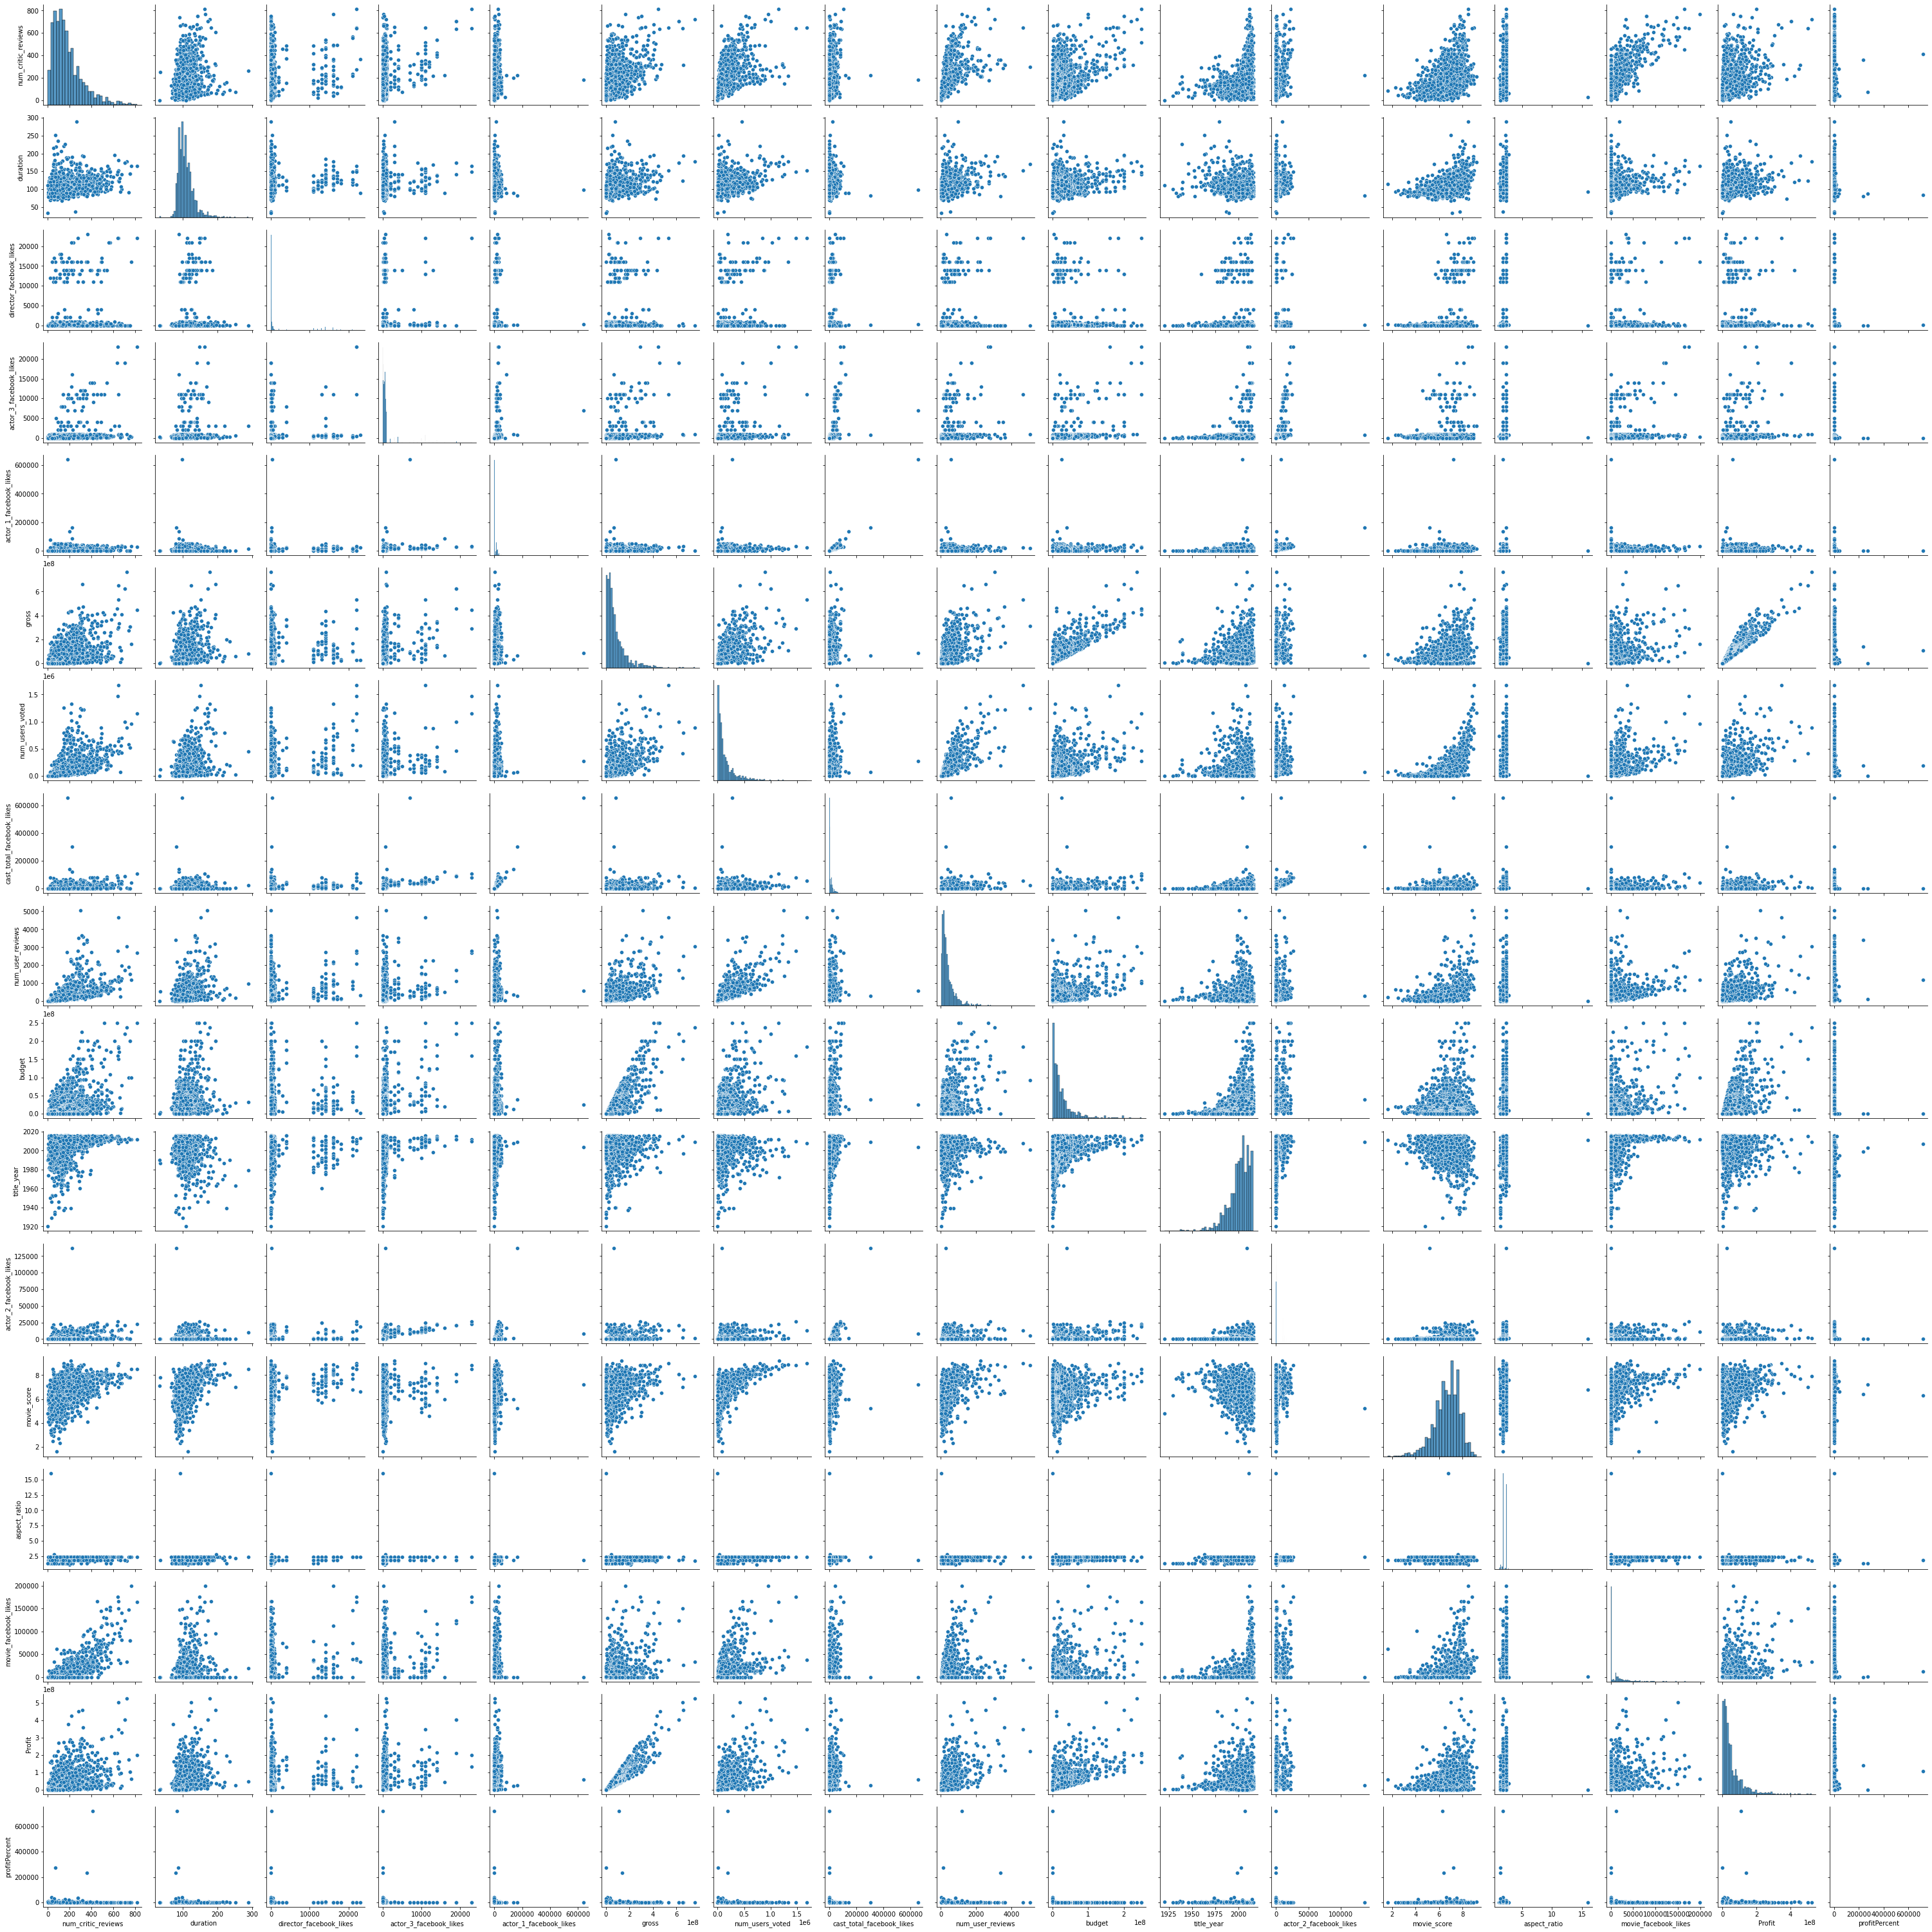

In [52]:
sns.pairplot(successfulMovies)

In [53]:
corr = successfulMovies.corr(method ='pearson')

In [54]:
corr

,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_users_voted,cast_total_facebook_likes,num_user_reviews,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,Profit,profitPercent
num_critic_reviews,1.000000,0.234172,0.194149,0.305545,0.129498,0.464326,0.586168,0.213107,0.559288,0.464714,0.408284,0.254914,0.365664,0.143518,0.736627,0.389564,0.041001
duration,0.234172,1.000000,0.190322,0.190512,0.059550,0.348595,0.415550,0.111548,0.362443,0.317181,-0.175847,0.139417,0.419305,0.124379,0.248090,0.311712,-0.052367
director_facebook_likes,0.194149,0.190322,1.000000,0.142435,0.073106,0.173660,0.337921,0.107160,0.248390,0.156394,-0.038188,0.116306,0.211658,0.051736,0.182087,0.156268,-0.012594
actor_3_facebook_likes,0.305545,0.190512,0.142435,1.000000,0.248676,0.365297,0.298705,0.477333,0.260312,0.413373,0.149492,0.533658,0.062147,0.053711,0.334171,0.277536,-0.021072
actor_1_facebook_likes,0.129498,0.059550,0.073106,0.248676,1.000000,0.127116,0.161598,0.948998,0.107842,0.135696,0.082083,0.363559,0.085981,0.031486,0.097309,0.101505,-0.020522
gross,0.464326,0.348595,0.173660,0.365297,0.127116,1.000000,0.613732,0.234523,0.549679,0.831875,0.107239,0.277452,0.219314,0.075282,0.374869,0.941550,-0.002471
num_users_voted,0.586168,0.415550,0.337921,0.298705,0.161598,0.613732,1.000000,0.236278,0.776786,0.494468,0.046374,0.245104,0.538238,0.087403,0.491264,0.587620,-0.004455
cast_total_facebook_likes,0.213107,0.111548,0.107160,0.477333,0.948998,0.234523,0.236278,1.000000,0.176009,0.257301,0.122707,0.609777,0.097682,0.049057,0.187146,0.183055,-0.026033
num_user_reviews,0.559288,0.362443,0.248390,0.260312,0.107842,0.549679,0.776786,0.176009,1.000000,0.471412,0.059003,0.205690,0.365672,0.085763,0.320131,0.508962,0.080069
budget,0.464714,0.317181,0.156394,0.413373,0.135696,0.831875,0.494468,0.257301,0.471412,1.000000,0.230334,0.315179,0.119585,0.120311,0.338212,0.596300,-0.046869


In [55]:
s = corr.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[19:30]

gross                      Profit                    0.941550
Profit                     gross                     0.941550
budget                     gross                     0.831875
gross                      budget                    0.831875
num_users_voted            num_user_reviews          0.776786
num_user_reviews           num_users_voted           0.776786
num_critic_reviews         movie_facebook_likes      0.736627
movie_facebook_likes       num_critic_reviews        0.736627
gross                      num_users_voted           0.613732
num_users_voted            gross                     0.613732
cast_total_facebook_likes  actor_2_facebook_likes    0.609777
dtype: float64

<AxesSubplot:>

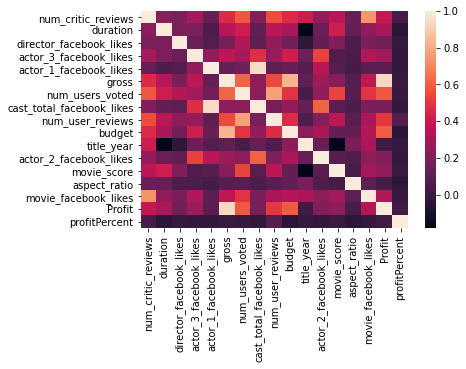

In [56]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

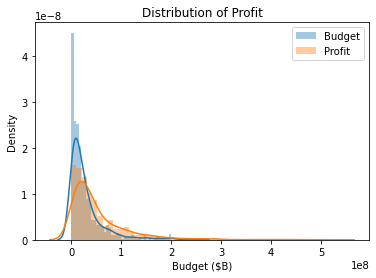

In [57]:
fig = plt.figure(figsize = (6, 4)) 

# plot distribution of budget
sns.distplot(successfulMovies.budget, label = 'Budget') 

# plot distribution of profit
sns.distplot(successfulMovies.Profit, label = "Profit")
plt.title("Distribution of Profit")
plt.xlabel("Budget ($B)")
plt.legend() # add legend


plt.show()

In [58]:
#since the data is right skewed, a log transformation is done
successfulMovies['logProfit'] = np.log(successfulMovies['Profit'])
successfulMovies['logBudget'] = np.log(successfulMovies['budget'])

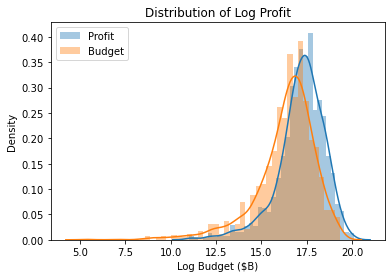

In [59]:
fig = plt.figure(figsize = (6, 4)) 

# plot distribution of profit 
sns.distplot(successfulMovies.logProfit, label = 'Profit') 

# plot distribution of budget
sns.distplot(successfulMovies.logBudget, label = "Budget")
plt.title("Distribution of Log Profit")
plt.xlabel("Log Budget ($B)")
plt.legend() # add legend


plt.show()

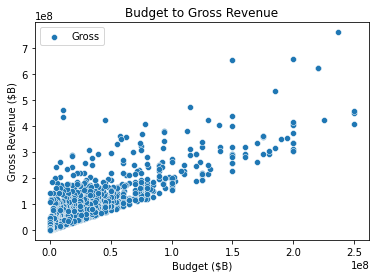

In [60]:
# compare budget and revenue

fig = plt.figure(figsize = (6, 4))

sns.scatterplot(x = 'budget', y = 'gross', label = "Gross", data = successfulMovies)

plt.title("Budget to Gross Revenue")
plt.ylabel("Gross Revenue ($B)")
plt.xlabel("Budget ($B)")
plt.legend()

plt.show()

### Predictive model

In [61]:
#add new variable to the main dataset
moviedf['isSuccessful'] = moviedf['profitPercent']>50

In [62]:
moviedf

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,Profit,profitPercent,isSuccessful
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.89,True
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.13,False
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.34,False
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.25,True
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.29,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0,5968.00,True
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74,63071.0,901.01,True
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,29056.00,True
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,-4416.0,-49.07,False


In [63]:
moviedf['isSuccessful'] = moviedf['isSuccessful'].astype(int)

In [64]:
moviedf

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,Profit,profitPercent,isSuccessful
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.89,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.13,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.34,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.25,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0,5968.00,1
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74,63071.0,901.01,1
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,29056.00,1
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413,-4416.0,-49.07,0


In [65]:
categorical_col=['color','director_name','actor_2_name','actor_1_name','actor_3_name','language','country','content_rating']
for item in categorical_col:
    moviedf[item]=moviedf[item].astype('category')
cat_columns = moviedf.select_dtypes(['category']).columns
moviedf[cat_columns] = moviedf[cat_columns].apply(lambda x: x.cat.codes)


In [66]:
moviedf

,color,director_name,num_critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,Profit,profitPercent,isSuccessful
0,1,655,723.0,178.0,0.0,855.0,1055,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,7,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.89,1
1,1,567,302.0,169.0,563.0,1000.0,1670,40000.0,309404152.0,Action|Adventure|Fantasy,...,7,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.13,0
2,1,1473,602.0,148.0,0.0,161.0,1881,11000.0,200074175.0,Action|Adventure|Thriller,...,7,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.34,0
3,1,260,813.0,164.0,22000.0,23000.0,405,27000.0,448130642.0,Action|Thriller,...,7,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.25,1
5,1,65,462.0,132.0,475.0,530.0,1925,640.0,73058679.0,Action|Adventure|Sci-Fi,...,7,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,1,1504,143.0,77.0,291.0,8.0,546,291.0,424760.0,Drama|Sci-Fi|Thriller,...,7,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0,5968.00,1
5034,1,1195,35.0,80.0,0.0,0.0,647,0.0,70071.0,Thriller,...,5,7000.0,2005.0,0.0,6.3,NaN,74,63071.0,901.01,1
5035,1,1413,56.0,81.0,0.0,6.0,1734,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,9,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,29056.00,1
5037,1,439,14.0,95.0,0.0,133.0,321,296.0,4584.0,Comedy|Drama,...,5,9000.0,2011.0,205.0,6.4,NaN,413,-4416.0,-49.07,0


Some of the columns will not contribute to the prediction model, because for a new movie to be produced, we will not have the data for these attributes

In [67]:
moviedf.drop(columns=['movie_title','num_users_voted','num_user_reviews','title_year',
                      'movie_facebook_likes','num_critic_reviews'], inplace=True)

In [68]:
moviedf

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,actor_2_facebook_likes,movie_score,aspect_ratio,Profit,profitPercent,isSuccessful
0,1,655,178.0,0.0,855.0,1055,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,197,...,10,45,7,237000000.0,936.0,7.9,1.78,523505847.0,220.89,1
1,1,567,169.0,563.0,1000.0,1670,40000.0,309404152.0,Action|Adventure|Fantasy,718,...,10,45,7,300000000.0,5000.0,7.1,2.35,9404152.0,3.13,0
2,1,1473,148.0,0.0,161.0,1881,11000.0,200074175.0,Action|Adventure|Thriller,266,...,10,44,7,245000000.0,393.0,6.8,2.35,-44925825.0,-18.34,0
3,1,260,164.0,22000.0,23000.0,405,27000.0,448130642.0,Action|Thriller,1411,...,10,45,7,250000000.0,23000.0,8.5,2.35,198130642.0,79.25,1
5,1,65,132.0,475.0,530.0,1925,640.0,73058679.0,Action|Adventure|Sci-Fi,332,...,10,45,7,263700000.0,632.0,6.6,2.35,-190641321.0,-72.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,1,1504,77.0,291.0,8.0,546,291.0,424760.0,Drama|Sci-Fi|Thriller,1296,...,10,45,7,7000.0,45.0,7.0,1.85,417760.0,5968.00,1
5034,1,1195,80.0,0.0,0.0,647,0.0,70071.0,Thriller,555,...,10,34,5,7000.0,0.0,6.3,NaN,63071.0,901.01,1
5035,1,1413,81.0,0.0,6.0,1734,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,206,...,32,45,9,7000.0,20.0,6.9,1.37,2033920.0,29056.00,1
5037,1,439,95.0,0.0,133.0,321,296.0,4584.0,Comedy|Drama,801,...,10,45,5,9000.0,205.0,6.4,NaN,-4416.0,-49.07,0


In [69]:
gdf = moviedf['genres'].str.get_dummies(sep='|')

In [70]:
gdf

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
5034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5035,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5037,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
finaldf = pd.concat([moviedf,gdf], axis=1)

In [72]:
finaldf

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,655,178.0,0.0,855.0,1055,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,197,...,0,0,0,0,1,0,0,0,0,0
1,1,567,169.0,563.0,1000.0,1670,40000.0,309404152.0,Action|Adventure|Fantasy,718,...,0,0,0,0,0,0,0,0,0,0
2,1,1473,148.0,0.0,161.0,1881,11000.0,200074175.0,Action|Adventure|Thriller,266,...,0,0,0,0,0,0,0,1,0,0
3,1,260,164.0,22000.0,23000.0,405,27000.0,448130642.0,Action|Thriller,1411,...,0,0,0,0,0,0,0,1,0,0
5,1,65,132.0,475.0,530.0,1925,640.0,73058679.0,Action|Adventure|Sci-Fi,332,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,1,1504,77.0,291.0,8.0,546,291.0,424760.0,Drama|Sci-Fi|Thriller,1296,...,0,0,0,0,1,0,0,1,0,0
5034,1,1195,80.0,0.0,0.0,647,0.0,70071.0,Thriller,555,...,0,0,0,0,0,0,0,1,0,0
5035,1,1413,81.0,0.0,6.0,1734,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,206,...,0,0,0,1,0,0,0,1,0,0
5037,1,439,95.0,0.0,133.0,321,296.0,4584.0,Comedy|Drama,801,...,0,0,0,0,0,0,0,0,0,0


In [73]:
finaldf.drop(columns=['genres'], inplace=True)

In [74]:
finaldf

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,cast_total_facebook_likes,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,655,178.0,0.0,855.0,1055,1000.0,760505847.0,197,4834,...,0,0,0,0,1,0,0,0,0,0
1,1,567,169.0,563.0,1000.0,1670,40000.0,309404152.0,718,48350,...,0,0,0,0,0,0,0,0,0,0
2,1,1473,148.0,0.0,161.0,1881,11000.0,200074175.0,266,11700,...,0,0,0,0,0,0,0,1,0,0
3,1,260,164.0,22000.0,23000.0,405,27000.0,448130642.0,1411,106759,...,0,0,0,0,0,0,0,1,0,0
5,1,65,132.0,475.0,530.0,1925,640.0,73058679.0,332,1873,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,1,1504,77.0,291.0,8.0,546,291.0,424760.0,1296,368,...,0,0,0,0,1,0,0,1,0,0
5034,1,1195,80.0,0.0,0.0,647,0.0,70071.0,555,0,...,0,0,0,0,0,0,0,1,0,0
5035,1,1413,81.0,0.0,6.0,1734,121.0,2040920.0,206,147,...,0,0,0,1,0,0,0,1,0,0
5037,1,439,95.0,0.0,133.0,321,296.0,4584.0,801,690,...,0,0,0,0,0,0,0,0,0,0


In [75]:
finaldf.dropna(inplace=True)

In [77]:
finaldf.drop(columns=['plot_keywords'], inplace=True)

In [78]:
finaldf.columns

Index(['color', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'actor_1_name', 'cast_total_facebook_likes', 'actor_3_name',
       'language', 'country', 'content_rating', 'budget',
       'actor_2_facebook_likes', 'movie_score', 'aspect_ratio', 'Profit',
       'profitPercent', 'isSuccessful', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [79]:
finaldf = finaldf[['color', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
        'actor_1_name', 'cast_total_facebook_likes', 'actor_3_name',
       'language', 'country', 'content_rating','budget',
       'actor_2_facebook_likes',  'aspect_ratio', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western', 'isSuccessful']]

In [80]:
finaldf

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,actor_1_name,cast_total_facebook_likes,actor_3_name,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,isSuccessful
0,1,655,178.0,0.0,855.0,1055,1000.0,197,4834,2627,...,0,0,0,1,0,0,0,0,0,1
1,1,567,169.0,563.0,1000.0,1670,40000.0,718,48350,1035,...,0,0,0,0,0,0,0,0,0,0
2,1,1473,148.0,0.0,161.0,1881,11000.0,266,11700,2384,...,0,0,0,0,0,0,1,0,0,0
3,1,260,164.0,22000.0,23000.0,405,27000.0,1411,106759,1308,...,0,0,0,0,0,0,1,0,0,1
5,1,65,132.0,475.0,530.0,1925,640.0,332,1873,2046,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,1,646,90.0,397.0,0.0,1598,5.0,465,5,1843,...,0,0,0,0,0,0,0,0,0,1
5029,1,954,111.0,62.0,6.0,138,89.0,834,115,646,...,0,1,0,0,0,0,1,0,0,0
5033,1,1504,77.0,291.0,8.0,546,291.0,1296,368,381,...,0,0,0,1,0,0,1,0,0,1
5035,1,1413,81.0,0.0,6.0,1734,121.0,206,147,507,...,0,0,1,0,0,0,1,0,0,1


#### Using RandomForest Classifier to find the feature importance

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

In [82]:
X=finaldf.iloc[:,:-1] #all independent variables
y=finaldf.iloc[:,-1] #target variable
fit_rf=RandomForestClassifier(random_state=0)

Using GridSearch for hyperparameter tuning

In [ ]:
np.random.seed(0)
param_dist = {'max_depth':[2,3,4],
             'bootstrap':[True, False],
              'n_estimators':[10,50,100],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(fit_rf,cv=10,param_grid=param_dist,n_jobs=3)

cv_rf.fit(X,y)

print('Best parameters using grid search: \n',
     cv_rf.best_params_)

Run RF classifier for features selection

In [ ]:
fit_rf.set_params(criterion='entropy',n_estimators = 100,max_features='log2',max_depth=2,bootstrap=False)
fit_rf.fit(X,y)

def variable_importance(fit):
    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance':importances,'index':indices}

var_imp_rf=variable_importance(fit_rf)
importances_rf=var_imp_rf['importance']
indices_rf=var_imp_rf['index']

print('The top factors influencing the performance of the movies are')
feature_name=['color', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
        'actor_1_name', 'cast_total_facebook_likes', 'actor_3_name',
       'language', 'country', 'content_rating','budget',
       'actor_2_facebook_likes',  'aspect_ratio', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western']


for i in range(0,indices_rf.shape[0]):
    f = i
    if round(importances_rf[indices_rf[f]],2) > 0:
        print('{0}. {1} - importance={2}'.format(f+1,feature_name[indices_rf[i]],round(importances_rf[indices_rf[f]],2)))
